In [47]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
#from qiskit.visualization import plot_bloch_multivector, plot_histogram
#import math

In [49]:
n=3
qr=QuantumRegister(n+1)
cr=ClassicalRegister(n)
ckt=QuantumCircuit(qr,cr)

In [51]:
ckt.h(range(n))
ckt.x(n)
ckt.h(n)
ckt.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q10'), 0), Qubit(QuantumRegister(4, 'q10'), 1), Qubit(QuantumRegister(4, 'q10'), 2), Qubit(QuantumRegister(4, 'q10'), 3)), clbits=())

In [53]:
# oracle is function dependent 
#e.g. oracle for f=x1 xor x2
# oracle x1,x2,y = x1,x2,y+f(x)= x1,x2,y+x1+x2
ckt.cx(0,1)
ckt.cx(1,2)
ckt.cx(2,3)
ckt.cx(1,2)
ckt.cx(0,1)
ckt.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q10'), 0), Qubit(QuantumRegister(4, 'q10'), 1), Qubit(QuantumRegister(4, 'q10'), 2), Qubit(QuantumRegister(4, 'q10'), 3)), clbits=())

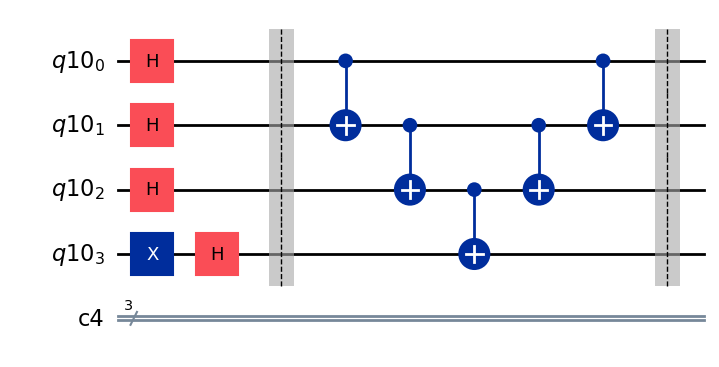

In [55]:
ckt.draw(output='mpl')

In [57]:
ckt.h(range(n))

In [59]:
ckt.measure(range(n),range(n))

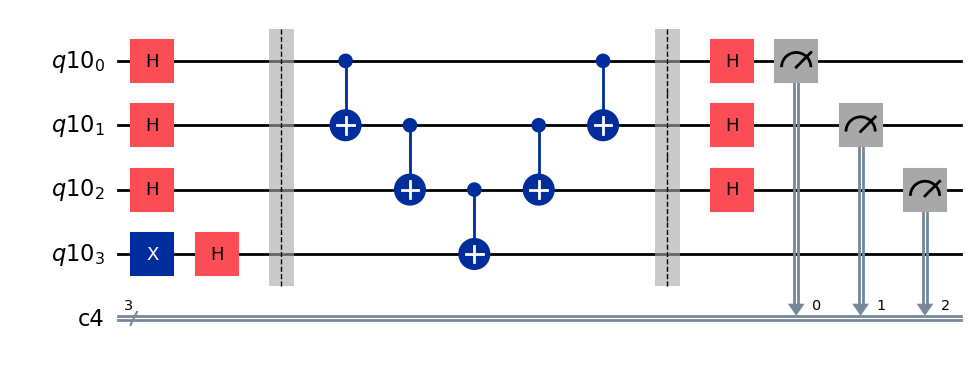

In [61]:
ckt.draw(output='mpl')

       ┌───┐      ░                           ░ ┌───┐┌─┐      
q10_0: ┤ H ├──────░───■───────────────────■───░─┤ H ├┤M├──────
       ├───┤      ░ ┌─┴─┐               ┌─┴─┐ ░ ├───┤└╥┘┌─┐   
q10_1: ┤ H ├──────░─┤ X ├──■─────────■──┤ X ├─░─┤ H ├─╫─┤M├───
       ├───┤      ░ └───┘┌─┴─┐     ┌─┴─┐└───┘ ░ ├───┤ ║ └╥┘┌─┐
q10_2: ┤ H ├──────░──────┤ X ├──■──┤ X ├──────░─┤ H ├─╫──╫─┤M├
       ├───┤┌───┐ ░      └───┘┌─┴─┐└───┘      ░ └───┘ ║  ║ └╥┘
q10_3: ┤ X ├┤ H ├─░───────────┤ X ├───────────░───────╫──╫──╫─
       └───┘└───┘ ░           └───┘           ░       ║  ║  ║ 
 c4: 3/═══════════════════════════════════════════════╩══╩══╩═
                                                      0  1  2 
{'111': 1000}


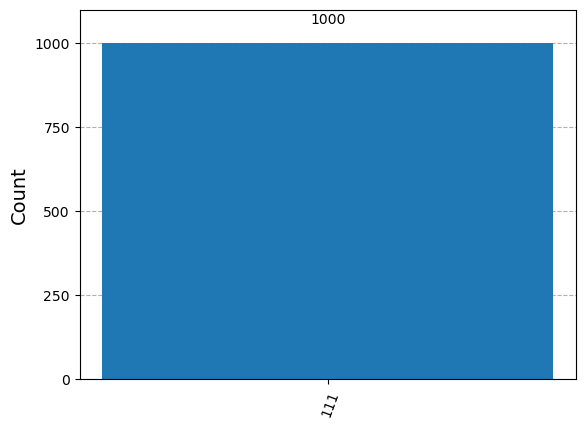

In [63]:
    print(ckt)
    
    #chosing backend and executing job
    backend = AerSimulator()
    
    # First we have to transpile the quantum circuit 
    # to the low-level QASM instructions used by the 
    # backend
    qc_compiled = transpile(ckt, backend)
    
    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend.run(qc_compiled, shots=1000)
    
    # Grab the results from the job.
    result_sim = job_sim.result()
    
    counts = result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)
    

In [19]:
IBMQ.load_account()

NameError: name 'IBMQ' is not defined

In [ ]:
provider=IBMQ.get_provider('ibm-q')


In [ ]:
avl_backends=provider.backends()
print(avl_backends)

In [ ]:
qcomp=provider.get_backend('ibmqx2')

In [ ]:
job=execute(ckt,backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result=job.result()

In [ ]:
plot_histogram(result.get_counts(ckt))